MACHINE LEARNING PROJECT: <br>
FOCUS SAVER : Real-Time Distraction Detector for Students<br>
"Know when you're slipping before you even realize it."<br>
AUTHOR: DEVIKA PRABHU<br>
ENTC STUDENT

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/focus_saver_dataset.csv")
print(df)

           current_site  is_study_site  is_distraction_site  idle_time_mins  \
0            reddit.com              0                    1            6.00   
1          linkedin.com              0                    0           10.95   
2             canva.com              0                    0           17.03   
3    takeyouforward.org              1                    0            4.19   
4           youtube.com              0                    1            1.77   
..                  ...            ...                  ...             ...   
495          reddit.com              0                    1            4.62   
496         twitter.com              0                    1           10.47   
497  takeyouforward.org              1                    0           11.47   
498      monkeytype.com              0                    0           19.33   
499          github.com              1                    0            6.12   

     tab_switch_count  click_count  time_spent_mins

In [ ]:
df.head()


,current_site,is_study_site,is_distraction_site,idle_time_mins,tab_switch_count,click_count,time_spent_mins,focus_label
0,reddit.com,0,1,6.00,24,56,21.97,Focused
1,linkedin.com,0,0,10.95,0,53,14.39,Distracted
2,canva.com,0,0,17.03,15,19,17.20,Procrastinating
3,takeyouforward.org,1,0,4.19,25,4,12.18,Focused
4,youtube.com,0,1,1.77,16,42,29.96,Deep Focus


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   current_site         500 non-null    object 
 1   is_study_site        500 non-null    int64  
 2   is_distraction_site  500 non-null    int64  
 3   idle_time_mins       500 non-null    float64
 4   tab_switch_count     500 non-null    int64  
 5   click_count          500 non-null    int64  
 6   time_spent_mins      500 non-null    float64
 7   focus_label          500 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 31.4+ KB


In [ ]:
df.describe()


,is_study_site,is_distraction_site,idle_time_mins,tab_switch_count,click_count,time_spent_mins
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.416000,0.372000,9.673200,12.596000,50.114000,15.480020
std,0.493387,0.483822,5.699273,7.557448,28.698715,8.514308
min,0.000000,0.000000,0.110000,0.000000,0.000000,1.110000
25%,0.000000,0.000000,4.827500,6.000000,24.000000,8.122500
50%,0.000000,0.000000,9.470000,12.000000,50.000000,15.575000
75%,1.000000,1.000000,14.515000,19.000000,75.000000,22.515000
max,1.000000,1.000000,19.990000,25.000000,100.000000,29.960000


In [ ]:
print(df['focus_label'].value_counts())

focus_label
Distracted           91
Focused              87
Mildly Distracted    84
Break Mode           84
Procrastinating      79
Deep Focus           75
Name: count, dtype: int64


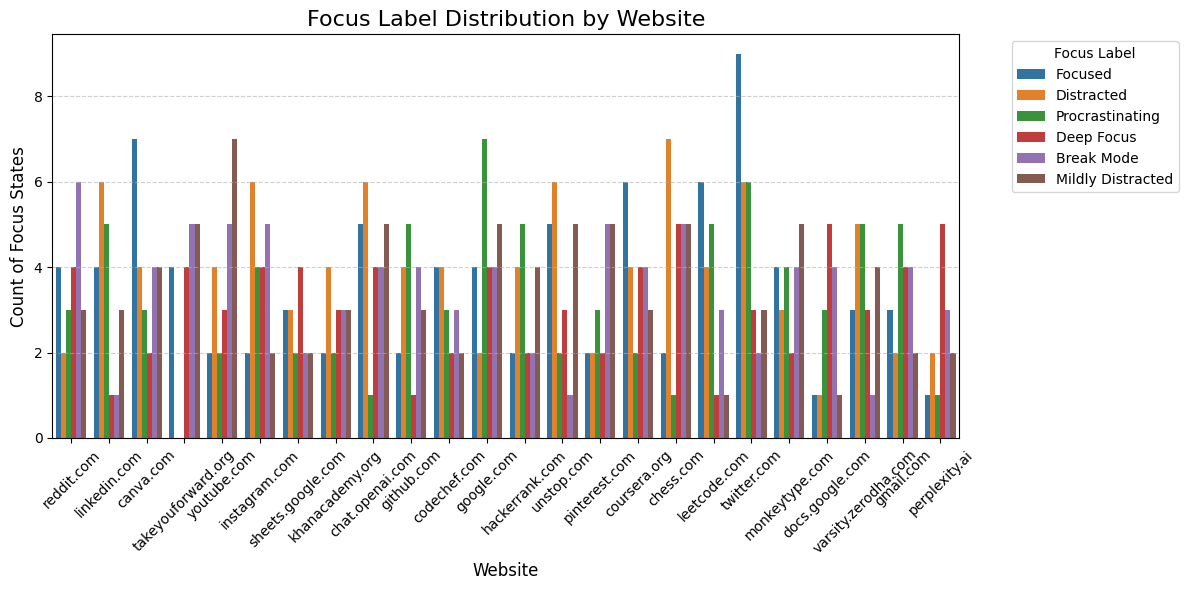

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='current_site', hue='focus_label')
plt.title("Focus Label Distribution by Website", fontsize=16)
plt.xlabel("Website", fontsize=12)
plt.ylabel("Count of Focus States", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Focus Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<Figure size 1400x700 with 0 Axes>

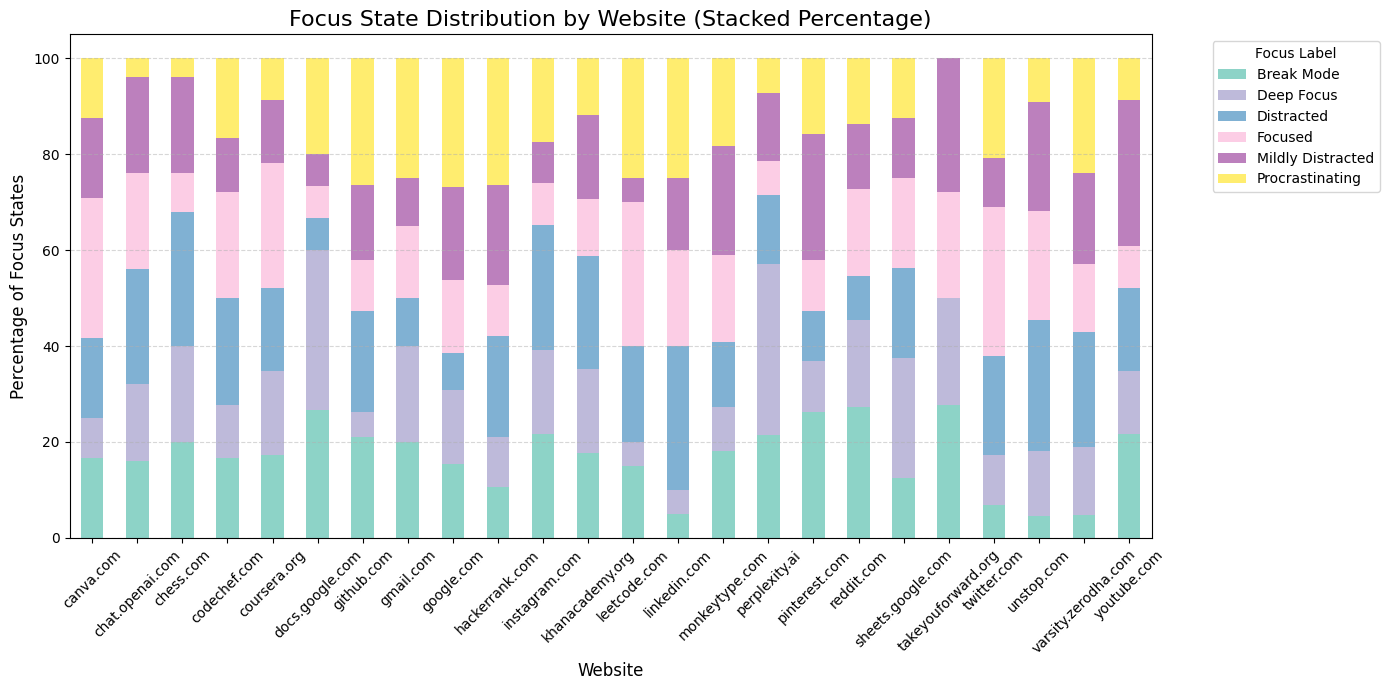

In [ ]:
# Step 1: Create a frequency table (count of each label per site)
site_label_counts = df.groupby(['current_site', 'focus_label']).size().unstack(fill_value=0)

# Step 2: Convert counts to percentages (row-wise)
site_label_percent = site_label_counts.div(site_label_counts.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
plt.figure(figsize=(14, 7))
site_label_percent.plot(kind='bar', stacked=True, colormap='Set3', figsize=(14, 7))

plt.title("Focus State Distribution by Website (Stacked Percentage)", fontsize=16)
plt.xlabel("Website", fontsize=12)
plt.ylabel("Percentage of Focus States", fontsize=12)
plt.legend(title='Focus Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoders
le_site = LabelEncoder()
le_label = LabelEncoder()

# Encode 'current_site' → domain/category
df['site_encoded'] = le_site.fit_transform(df['current_site'])

# Encode 'focus_label' → target label
df['label_encoded'] = le_label.fit_transform(df['focus_label'])

# Optional: View mappings
print("Focus Label Encoding Mapping:", dict(zip(le_label.classes_, le_label.transform(le_label.classes_))))
print("Site Encoding Mapping:", dict(zip(le_site.classes_, le_site.transform(le_site.classes_))))

Focus Label Encoding Mapping: {'Break Mode': np.int64(0), 'Deep Focus': np.int64(1), 'Distracted': np.int64(2), 'Focused': np.int64(3), 'Mildly Distracted': np.int64(4), 'Procrastinating': np.int64(5)}
Site Encoding Mapping: {'canva.com': np.int64(0), 'chat.openai.com': np.int64(1), 'chess.com': np.int64(2), 'codechef.com': np.int64(3), 'coursera.org': np.int64(4), 'docs.google.com': np.int64(5), 'github.com': np.int64(6), 'gmail.com': np.int64(7), 'google.com': np.int64(8), 'hackerrank.com': np.int64(9), 'instagram.com': np.int64(10), 'khanacademy.org': np.int64(11), 'leetcode.com': np.int64(12), 'linkedin.com': np.int64(13), 'monkeytype.com': np.int64(14), 'perplexity.ai': np.int64(15), 'pinterest.com': np.int64(16), 'reddit.com': np.int64(17), 'sheets.google.com': np.int64(18), 'takeyouforward.org': np.int64(19), 'twitter.com': np.int64(20), 'unstop.com': np.int64(21), 'varsity.zerodha.com': np.int64(22), 'youtube.com': np.int64(23)}


In [ ]:
# Select input features
feature_cols = [
    'site_encoded',            # Encoded domain name
    'is_study_site',           # 0 or 1
    'is_distraction_site',     # 0 or 1
    'idle_time_mins',
    'tab_switch_count',
    'click_count',
    'time_spent_mins'
]

X = df[feature_cols]
y = df['label_encoded']

print(X)
print(y)

     site_encoded  is_study_site  is_distraction_site  idle_time_mins  \
0              17              0                    1            6.00   
1              13              0                    0           10.95   
2               0              0                    0           17.03   
3              19              1                    0            4.19   
4              23              0                    1            1.77   
..            ...            ...                  ...             ...   
495            17              0                    1            4.62   
496            20              0                    1           10.47   
497            19              1                    0           11.47   
498            14              0                    0           19.33   
499             6              1                    0            6.12   

     tab_switch_count  click_count  time_spent_mins  
0                  24           56            21.97  
1              

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.25

Classification Report:
                    precision    recall  f1-score   support

       Break Mode       0.25      0.18      0.21        17
       Deep Focus       0.44      0.27      0.33        15
       Distracted       0.41      0.39      0.40        18
          Focused       0.12      0.12      0.12        17
Mildly Distracted       0.20      0.35      0.26        17
  Procrastinating       0.19      0.19      0.19        16

         accuracy                           0.25       100
        macro avg       0.27      0.25      0.25       100
     weighted avg       0.27      0.25      0.25       100



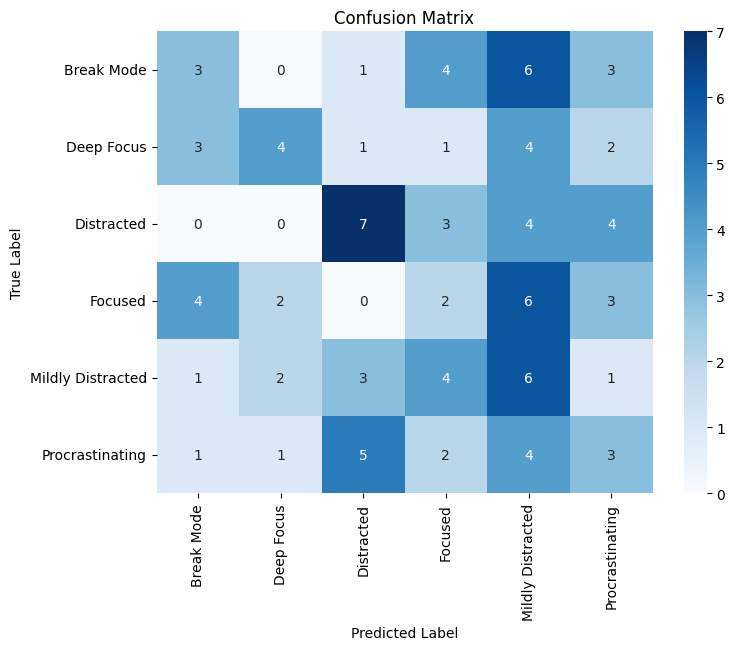

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_label.classes_))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=le_label.classes_, yticklabels=le_label.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
def predict_focus_state(input_data):
    """
    input_data: dict with keys:
        current_site, is_study_site, is_distraction_site,
        idle_time_mins, tab_switch_count, click_count, time_spent_mins
    """
    # Step 1: Convert site name to encoded value
    site_name = input_data['current_site']
    if site_name not in le_site.classes_:
        print(f"⚠️ Site '{site_name}' is unseen — prediction may not be accurate.")
        site_encoded = -1  # or map to a default/unknown site code
    else:
        site_encoded = le_site.transform([site_name])[0]

    # Step 2: Create the feature array (match order used in training)
    features = [[
        site_encoded,
        input_data['is_study_site'],
        input_data['is_distraction_site'],
        input_data['idle_time_mins'],
        input_data['tab_switch_count'],
        input_data['click_count'],
        input_data['time_spent_mins']
    ]]

    # Step 3: Predict the label
    predicted_encoded = rf_model.predict(features)[0]
    predicted_label = le_label.inverse_transform([predicted_encoded])[0]

    return predicted_label


In [ ]:
import joblib

# Save the model and encoders
joblib.dump(rf_model, "focus_model.pkl")
joblib.dump(le_site, "site_encoder.pkl")
joblib.dump(le_label, "label_encoder.pkl")


['label_encoder.pkl']